# Assignment

Load a color image from the web, then: 

- visualize the three channels separatedly
- turn the whole image to black/white
- cut it to one quarter of its original size
- save the result

# Setup

In Python, [Pillow](https://pillow.readthedocs.io/en/3.0.x/handbook/tutorial.html) is one of the most popular library when it comes to working with image data. It's an evolution for Python 3 of the old PIL library, available for Python 2.

We'll use Pillow to load and save the data. But since we want to actually do the dirty work the image manipulation will be done in plain [Numpy](https://numpy.org/). In other words, we'll treat the image as a multi dimensional numeric array.

The assignment does not specify on which image we should work so I saved a chameleon image from wikipedia into this very repo. The url is:

In [1]:
image_url = 'https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/data/800px-Panther_chameleon_(Furcifer_pardalis)_male_Nosy_Be.jpg'

## Load the image from a remote URL

There's no need to save the image into the local memory. We can load it directly into an object via the combination of Pillow and [requests module](https://requests.readthedocs.io/en/master/), already discussed in a [previous exercise](https://github.com/ne1s0n/coding_excercises/blob/master/python/words.ipynb).

In [2]:
import requests          #required for remote access via urls
from PIL import Image    # PIL is Pillow Module, for image manipulation

response = requests.get(image_url, stream=True) #you may want to check response.status_code
img = Image.open(response.raw)

Older versions of ``Pillow``, before [release 2.8.0](https://pillow.readthedocs.io/en/3.0.x/releasenotes/2.8.0.html), required an extra [BytesIO layer](https://docs.python.org/3/library/io.html#io.BytesIO) between ``Pillow`` and ``requests``:

In [3]:
#not executing this code
if False:
    from PIL import Image
    import requests
    from io import BytesIO  #extra import

    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

Let's take a look at some of the image details:

In [4]:
#image metadata
print(img.format)
print(img.size)
print(img.mode)

JPEG
(800, 533)
RGB


So the image is a Jpeg, 800 pixels wide x 533 pixels high, and in three colors. Excellent!

## Image as numpy array

We have now the image as a ``Pillow`` object, but we want to actually see the pixels in the form of a numeric matrix. We can easily import the data into ``numpy`` via the [asarray function](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html):

In [5]:
import numpy
from numpy import asarray

# convert image to numpy array
npa = asarray(img)

#numpy array metadata
print(type(npa))
print(npa.shape)

<class 'numpy.ndarray'>
(533, 800, 3)


The ``npa`` object is not an "image" anymore, but it contains the same data. Please note that the dimension order changed, it is now (Height, Width, Channels).

We can visualize it in a jupyter notebook using [imshow function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) from [matplotlib.pyplot module](https://matplotlib.org/3.1.1/py-modindex.html):

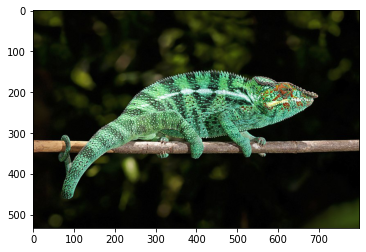

In [6]:
from matplotlib import pyplot

pyplot.imshow(npa)

## Visualize each channel

It is easy to [slice numpy arrays](https://numpy.org/doc/stable/reference/arrays.indexing.html), so we can plot each channel as a separate two dimensional image. For example the first pixels in the top left corner has this RGB values:

In [7]:
print(npa[0, 0, :])

[37 42 10]


Conversely, the first few pixels from the first channel (RED) are:


In [8]:
print(npa[0:3, 0:5, 0])

[[37 36 35 34 33]
 [35 34 34 33 32]
 [32 32 32 32 31]]


The assignment asks us to visualize the three channels separatedly. To do so we separate them in three arrays:

In [9]:
red   = npa[:, :, 0]
green = npa[:, :, 1]
blue  = npa[:, :, 2]

We now plot each channel as if it were a different black and white image, but with a caveat. In fact if I simply invoke again ``imshow``:

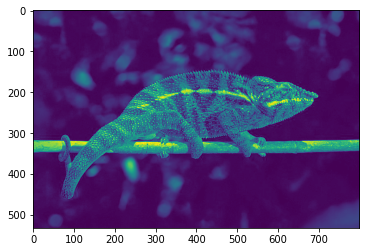

In [10]:
pyplot.imshow(red)

We notice that ``imshow`` renders the image in false colors via what is called a [Colormap](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap). The default one ranges from blue to green to yellow, as it can easily be seen if we build a simple gradient:

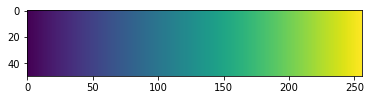

In [11]:
#building a gradient image, 50 pixel thick, with values ranging from 0 to 255
gradient = numpy.zeros((50, 256))
for i in range(256):
    gradient[:, i] = i

#showing the gradient
pyplot.imshow(gradient)

The ``gradient`` object is monochromatic (it has only one channel) but is rendered in false colors using a colormap called "viridis". To better show the nature of our data we can change the Colormap to a more conservative one, chosing from the [available named other Colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). I'd like to go with the greys:

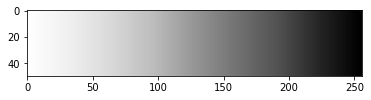

In [12]:
#showing the gradient, in grey scale
pyplot.imshow(gradient, cmap = 'Greys')

This however shows another problem: in RGB encoding low values mean "dark", with RGB code #000000 representing black. Conversely, high values mean "light", with #FFFFFF representing white. The "Greys" color map is reversed!

In fact, if I use it to show one of the channels of the image:

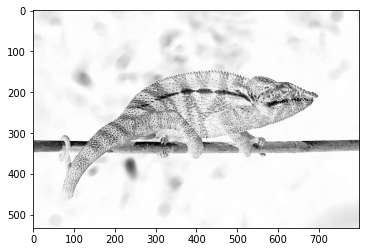

In [13]:
#showing the RED channel of the original image, with flipped brightness
pyplot.imshow(red, cmap = 'Greys')

The image is clearly in reverse colors. Luckily pyplot provides an easy [way to flip built-in Colormaps](https://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps): it suffices to append an "_r" at the end of the name:

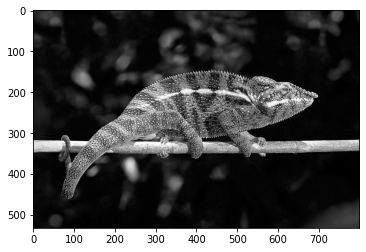

In [14]:
#showing the RED channel of the original image, with correct brightness
pyplot.imshow(red, cmap = 'Greys_r')

I can now show the three channels, separatedly, as black/white images. To show them in a single pass I need to create a [container figure](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html), and then add each one as a [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot):

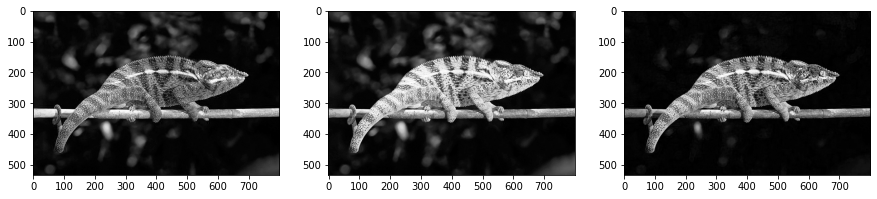

In [15]:
#big figure, default size is tiny in this case and we increase it a bit
fig=pyplot.figure(figsize=(15, 5))

fig.add_subplot(1,3,1)
pyplot.imshow(red, cmap = 'Greys_r')

fig.add_subplot(1,3,2)
pyplot.imshow(green, cmap = 'Greys_r')

fig.add_subplot(1,3,3)
pyplot.imshow(blue, cmap = 'Greys_r')

pyplot.show()

The green channel is brighter than the others. This is expected since the original image was very green. Moreover the background was mainly greens and yellows (remember: in RGB [yellow = red + green](https://en.wikipedia.org/wiki/RGB_color_model#/media/File:AdditiveColor.svg)). As a consequence the blue channel is almost black, since blue gives very little contribution there.

## Transform the image to black and white

The assignment asks us to transform the image from RGB to black and white. So far we worked with the three channels separatedly and then we plotted them. We now need to combine them in a new image with a single channel. The easiest way to do so is to take the average, for each pixel,  of each of the three channels. 

We recall that the first pixel of the image is:

In [16]:
print(npa[0, 0, :])

[37 42 10]


Luckily for us, numpy array contain a [.mean() method](https://numpy.org/doc/stable/reference/generated/numpy.mean.html):

In [17]:
print(npa[0, 0, :].mean())

29.666666666666668


Even more luckily, the ``.mean()`` method can accept the axis along with we need to compute the mean. Remember, our image is Height x Width x Channels:

In [18]:
print(npa.shape)

(533, 800, 3)


So it is enought to specify that we want to average along the color channels, thus keeping height and width intact:

In [19]:
npa_bw = npa.mean(2)
print(npa_bw.shape)

(533, 800)


The image has lost the third axis! It's now in true grey tones and is ready to be visualized:

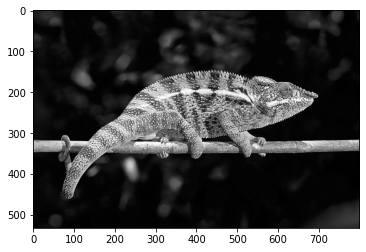

In [20]:
pyplot.imshow(npa_bw, cmap = 'Greys_r')

## Crop the image

The second to last assignment is to cut the image to a quarter of its original size and save it again as a proper image.

Cropping is very simple via numpy:

In [21]:
#retrieving old image dimensions
height, width = npa_bw.shape

#halving everything
half_height = height / 2
half_width  = width  / 2

#what do we have?
print('Old image size: ' + str(height) + ' x ' + str(width))
print('New image size: ' + str(half_height) + ' x ' + str(half_width))

Old image size: 533 x 800
New image size: 266.5 x 400.0


Given that we cannot have half pixels, we are going to truncate the values. Let's redo the operation:

In [22]:
#halving everything, forcing type to int
half_height = int(height / 2)
half_width =  int(width  / 2)

#what do we have?
print('Old image size: ' + str(height) + ' x ' + str(width))
print('New image size: ' + str(half_height) + ' x ' + str(half_width))

Old image size: 533 x 800
New image size: 266 x 400


Let's crop!

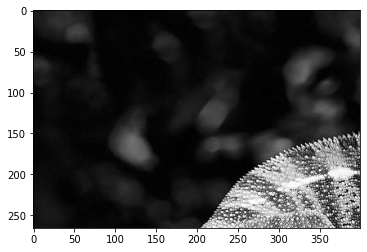

In [23]:
#the top left quarter
cropped_img = npa_bw[0:half_height, 0:half_width]

#taking a look at what we did
pyplot.imshow(cropped_img, cmap = 'Greys_r')

Just to be sure, let's take a look at all the possible divisions:

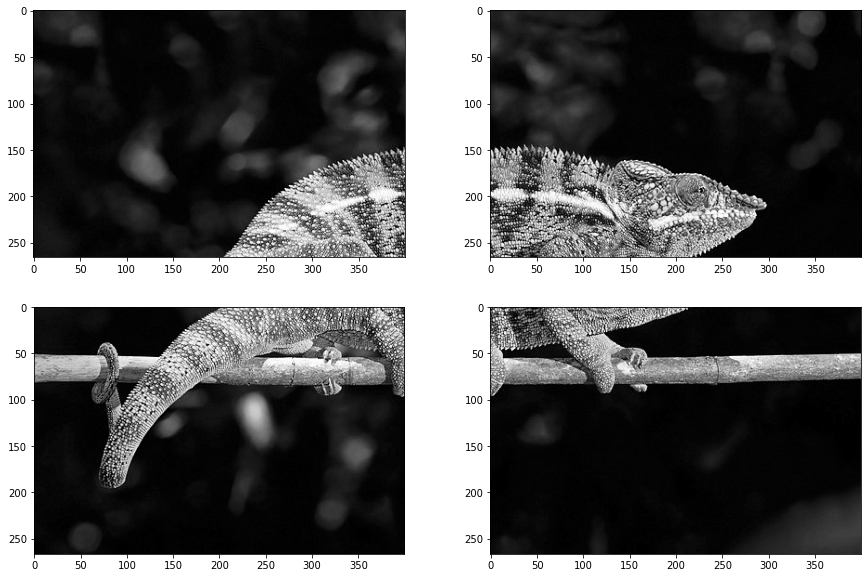

In [24]:
#cutting away
quarter_11 = npa_bw[0:half_height,      0:half_width]
quarter_12 = npa_bw[0:half_height,      half_width:width]
quarter_21 = npa_bw[half_height:height, 0:half_width]
quarter_22 = npa_bw[half_height:height, half_width:width]

#building a multi subplot image
fig=pyplot.figure(figsize=(15, 10))

fig.add_subplot(2,2,1)
pyplot.imshow(quarter_11, cmap = 'Greys_r')

fig.add_subplot(2,2,2)
pyplot.imshow(quarter_12, cmap = 'Greys_r')

fig.add_subplot(2,2,3)
pyplot.imshow(quarter_21, cmap = 'Greys_r')

fig.add_subplot(2,2,4)
pyplot.imshow(quarter_22, cmap = 'Greys_r')

pyplot.show()

Success!

## Save the image

Let's say that we want to save the top right corner of the image, the one with the head. Currently our image is in the form of a numpy 2D array. Moreover, since we averaged the pixels, values are something like:

In [25]:
print(quarter_12[0:3, 0:5])

[[31.33333333 30.33333333 29.         28.         26.66666667]
 [31.33333333 30.33333333 30.         28.         26.66666667]
 [32.33333333 31.33333333 29.33333333 28.         26.66666667]]


That is, floating point numbers. But the original data were integers in the 0-255 range, something like:

In [26]:
print(npa[0:3, 0:5, 0])

[[37 36 35 34 33]
 [35 34 34 33 32]
 [32 32 32 32 31]]


This is going to be a problem with the [Image.fromarray() function](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.fromarray), which we are going to use to save to file and which expects data already in the correct integer format.  
(It's actually a bit more complicated than that, depending on the final file type rescaling and data transformation can be required)

So we don't feed just ``quarter_12`` to .fromarray(), but we transform the data to unsigned 8-bits integers using numpy [astype function](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html):

In [27]:
#building a PIL object from a numpy one
im = Image.fromarray(quarter_12.astype(numpy.uint8))

#saving to the desired filename.
#File format is extracted from the extension (in this case: .jpg)
im.save('my_cham.jpg')

# Next steps...

This concludes our assignment. In this exercise we've worked with numpy arrays, matplotlib pyplot, Pillow (PIL) and images in general, plus remote and local saving. We built a solid solution but there's always room for improvement. Consider:

- images can come in different formats, and most notably can have a fourth channel: RGBA, where A stands for Alpha, which indicates transparency. How does the above steps change in case alpha channel is present?
- the assignment asked to quarter the original image. Is it possible to generalize the operation to an arbitrary number of pieces? And save them all with procedurally generated names?
- it is possible to perform many different operations on images, such as smoothing, edge detection, sharpening and many others described, e.g. in [Scipy tutorial on image processing](https://scipy-lectures.org/advanced/image_processing/)
